(mm1_intro_to_modelling)=
# Introduction to Modelling
```{index} Modelling
```

In [1]:
# This cell just imports relevant modules

import numpy as np
import scipy
import scipy.interpolate as si
import scipy.optimize as optimize
from math import pi, exp
import matplotlib.pyplot as plt

## Numerical differentiation

**Slide 16**

Computing first derivatives using central differences

In [2]:
x = np.array([0.0, 0.1, 0.2, 0.3, 0.4])
y = np.array([0.0, 0.0998, 0.1987, 0.2955, 0.3894])

# Here, the argument value of 0.1 is the 'sample distance' (i.e. dx)
derivatives = np.gradient(y, 0.1)
for i in range(0, len(x)):
    print("The derivative at x = %f is %f" % (x[i], derivatives[i])) 

The derivative at x = 0.000000 is 0.998000
The derivative at x = 0.100000 is 0.993500
The derivative at x = 0.200000 is 0.978500
The derivative at x = 0.300000 is 0.953500
The derivative at x = 0.400000 is 0.939000


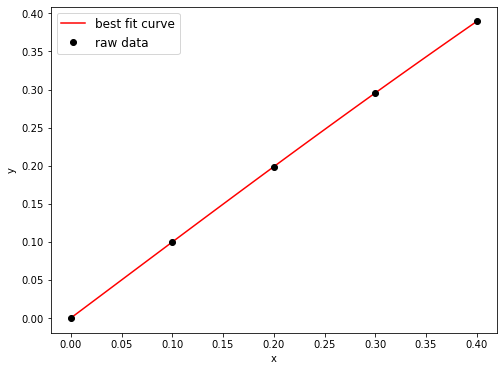

In [3]:
lp = si.lagrange(x, y)

xi = np.linspace(0, 0.4, 100)

fig = plt.figure(figsize=(8,6))
plt.plot(xi, lp(xi), 'r', label='best fit curve')
plt.plot(x, y, 'ko', label='raw data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fontsize=12)

plt.show()

## Numerical integration

**Slide 32**

In [4]:
time = np.array([0, 1, 2, 3, 4, 5, 6]) # Time in hours
discharge = np.array([0.07, 0.1, 0.06, 0.02, 0.07, 0.06, 0.05]) # Flow rate in m**3/s
time = time*3600.0 # Convert time in hours into time in seconds

integral = np.trapz(discharge, x=time) # Integrate using the trapezoidal rule. Units are m**3
print("The integral of the discharge data w.r.t. time is %.d m3" % integral) 

The integral of the discharge data w.r.t. time is 1332 m3


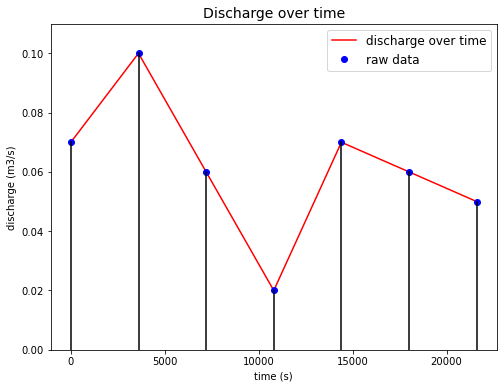

In [5]:
t = np.ones((len(time), 2))
for i in range(len(time)):
    t[i] = t[i] * i
    
t = t * 3600
    
y = np.zeros((len(discharge), 2))
for i in range(len(discharge)):
    y[i][1] = discharge[i]

fig = plt.figure(figsize=(8,6))

plt.plot(time, discharge, 'r', label='discharge over time')
plt.plot(time, discharge, 'bo', label='raw data')
for i in range(len(t)):
    plt.plot(t[i], y[i], 'k')
plt.xlabel('time (s)')
plt.ylabel('discharge (m3/s)')
plt.legend(loc='best', fontsize=12)
plt.title('Discharge over time', fontsize=14)
plt.ylim(0, 0.11)

plt.show()

In [6]:
area = 0
dt = 3600
for i in range(1,len(time)):
    area += 0.5 * (discharge[i]+discharge[i-1]) * dt
    
print("Area under all trapeziums =", area, "m3")

Area under all trapeziums = 1332.0 m3


## Forward Euler Method

**Slide 80**

In [7]:
print("Applying the forward Euler method to solve: dy/dx = 2*x*(1-y)...") 
def derivative(x,y):
    return 2*x*(1-y)

n = 7 # Number of desired solution points
dx = 0.4 # Distance between consecutive solution points along the x axis

x = np.zeros(n) # x value at each solution point, initially full of zeros.
y = np.zeros(n) # y value at each solution point, initially full of zeros.

# Now set up the initial condition. These two lines aren't really needed 
# since we have already initialised each component of the array to zero,
# but we'll put them here for completeness.
x[0] = 0
y[0] = 0 
print(f"At x = {x[0]}, y = {y[0]}")  # Print out the initial condition

for i in range(0, n-1):
    x[i+1] = x[i] + dx
    y[i+1] = y[i] + derivative(x[i],y[i])*dx
    print(f"At x = {x[i+1]:.1f}, y = {y[i+1]:.1f}") 

Applying the forward Euler method to solve: dy/dx = 2*x*(1-y)...
At x = 0.0, y = 0.0
At x = 0.4, y = 0.0
At x = 0.8, y = 0.3
At x = 1.2, y = 0.8
At x = 1.6, y = 1.0
At x = 2.0, y = 1.0
At x = 2.4, y = 1.0


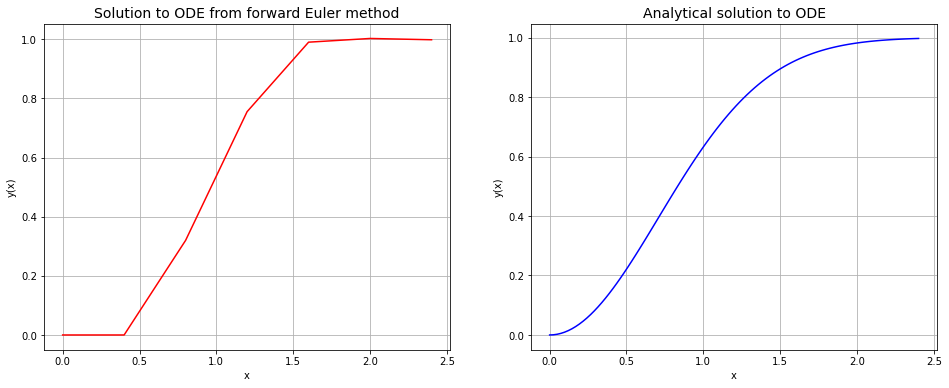

In [8]:
xi = np.linspace(0, 2.4, 100)
yi = 1 - np.exp(-xi**2)

fig = plt.figure(figsize=(16,6))

ax1 = fig.add_subplot(121)
ax1.plot(x, y, 'r')
ax1.set_xlabel('x')
ax1.set_ylabel('y(x)')
ax1.set_title("Solution to ODE from forward Euler method", fontsize=14)
ax1.grid(True)

ax2 = fig.add_subplot(122)
ax2.plot(xi, yi, 'b')
ax2.set_xlabel('x')
ax2.set_ylabel('y(x)')
ax2.set_title("Analytical solution to ODE", fontsize=14)
ax2.grid(True)

plt.show()

## Root finding 

### Bisection method

**Slide 83**

Finding the root using bisection method in Python using `scipy.optimize.bisect`

In [9]:
def f(x):
    return x*exp(x) - 1

# We must specify limits a and b in the arguments list
# so the method can find the root somewhere in between them.
bisect_root = optimize.bisect(f, a=0, b=1)

# Print out the root. Also print out the value of f at the root, 
# which should be zero if the root has been found accurately.
print(f"The root of the function f(x) is: {bisect_root:.6f}. At this point, f(x) = {f(bisect_root):.6f}") 

The root of the function f(x) is: 0.567143. At this point, f(x) = 0.000000


### Newton-Raphson method

**Slide 114**

Finding the root using Newton-Raphson method in Python using `scipy.optimize.newton`

In [10]:
def f(x):
    return x*exp(x) - 1

# We must provide the method with a starting point x0 (here we have chosen x0=0).
newton_root = optimize.newton(f, x0=0)
print(f"The root of the function f(x) is: {newton_root:.6f}. At this point, f(x) = {f(newton_root):.6f}") 

The root of the function f(x) is: 0.567143. At this point, f(x) = -0.000000


Roots obtained from bisection and Newton-Raphson methods are the same


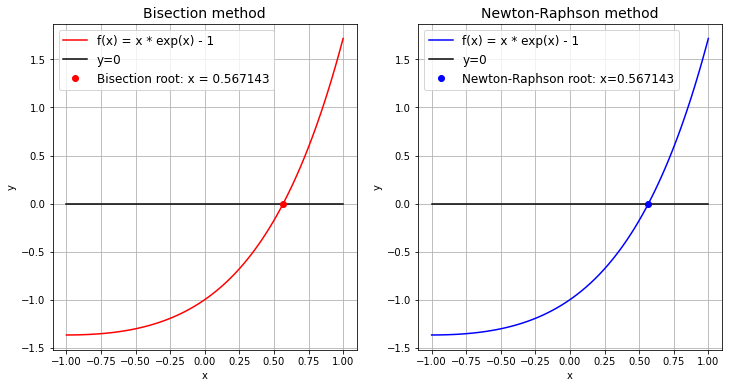

In [11]:
if np.allclose(bisect_root, newton_root) == True:
    print("Roots obtained from bisection and Newton-Raphson methods are the same")
else:
    print("Roots obtained from bisection and Newton-Raphson methods are NOT the same")

x = np.linspace(-1, 1, 100)
y = x * np.exp(x) - 1
yi = np.zeros(len(x))

fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(121)
ax1.plot(x, y, 'r', label='f(x) = x * exp(x) - 1')
ax1.plot(x, yi, 'k', label='y=0')
ax1.plot(bisect_root, f(bisect_root), 'ro', label='Bisection root: x = %.6f' % (bisect_root))
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Bisection method', fontsize=14)
ax1.legend(loc='best', fontsize=12)
ax1.grid(True)

ax2 = fig.add_subplot(122)
ax2.plot(x, y, 'b', label='f(x) = x * exp(x) - 1')
ax2.plot(x, yi, 'k', label='y=0')
ax2.plot(newton_root, f(newton_root), 'bo', label='Newton-Raphson root: x=%.6f' % (newton_root))
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Newton-Raphson method', fontsize=14)
ax2.legend(loc='best', fontsize=12)
ax2.grid(True)

plt.show()

## Dominant eigenvalues

**Slide 156**

Find dominant eigenvalues in Python using `numpy.linalg.eigvals`

In [12]:
A = np.array([[2, 2],
              [1, 4]])

print("The eigenvalues of A are %.f and %.f" % (np.linalg.eigvals(A)[0], np.linalg.eigvals(A)[1]))

# The max and abs functions have been used to pick out the eigenvalue with the largest magnitude.
print("The dominant eigenvalue of A is: %.f" % max(abs(np.linalg.eigvals(A)))) 

The eigenvalues of A are 1 and 5
The dominant eigenvalue of A is: 5


```{note}

Note that for sparse matrices, we can use the following scipy function. The optional argument k is for controlling the desired number of eigenvalues returned.

```

In [13]:
print(scipy.sparse.linalg.eigs(A, k=1)) 

(array([1.26794919+0.j, 4.73205081+0.j]), array([[-0.9390708 , -0.59069049],
       [ 0.34372377, -0.80689822]]))


C:\Users\Dundo\Anaconda3\lib\site-packages\scipy\sparse\linalg\eigen\arpack\arpack.py:1269: RuntimeWarning: k >= N - 1 for N * N square matrix. Attempting to use scipy.linalg.eig instead.
  RuntimeWarning)
